<a href="https://colab.research.google.com/github/ooke22/Mall-Customer-Segmentation/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Context:
You own a supermarket mall and possess basic customer data such as Customer ID, age, gender, annual income, and spending score through membership cards.
## Problem Statement
----
As the mall owner, you aim to comprehend the easily reachable and convergent target customers. This understanding will guide the marketing team in devising a suitable strategy.

### Data Dictionary:
* CustomerID - Unique ID assigned to the customer.
* Gender - Gender of the customer.
* Age - Age of the customer.
* Annual Income - Annual income of the customer.
* Spending Score - Score assigned by the mall based on customer behavior and spending nature. (1-100)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv(r'/content/drive/MyDrive/Unsupervised Learning Practice/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Observation
* There are 200 observations and 5 columns.
* All the columns except Gender are numerical.
* Gender will need to be dummified to be represented as numerical values.
* All columns have 200 non-null values i.e. there are no missing values.


In [ ]:
data.duplicated().sum()

0

### Observation
* There are no duplicates.

# Exploratory Analysis

In [ ]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


### Observation
* The average age of customers is ~ 39 years old. Customer's age has a high range from age 18 to 70.
* Age seems to have a lesser standard deviation which reflects less variability across customers.
* The average income of customers is $60,000.
* Income shows a high variability which can be expected as the customers all have different income levels.
* Spending score has a high range from 1 to 99. The average spending score is approx 50.
* There are significantly more female customers (112) than male customers (88).


### Exploratory Analysis


Age
Skew:  0.49


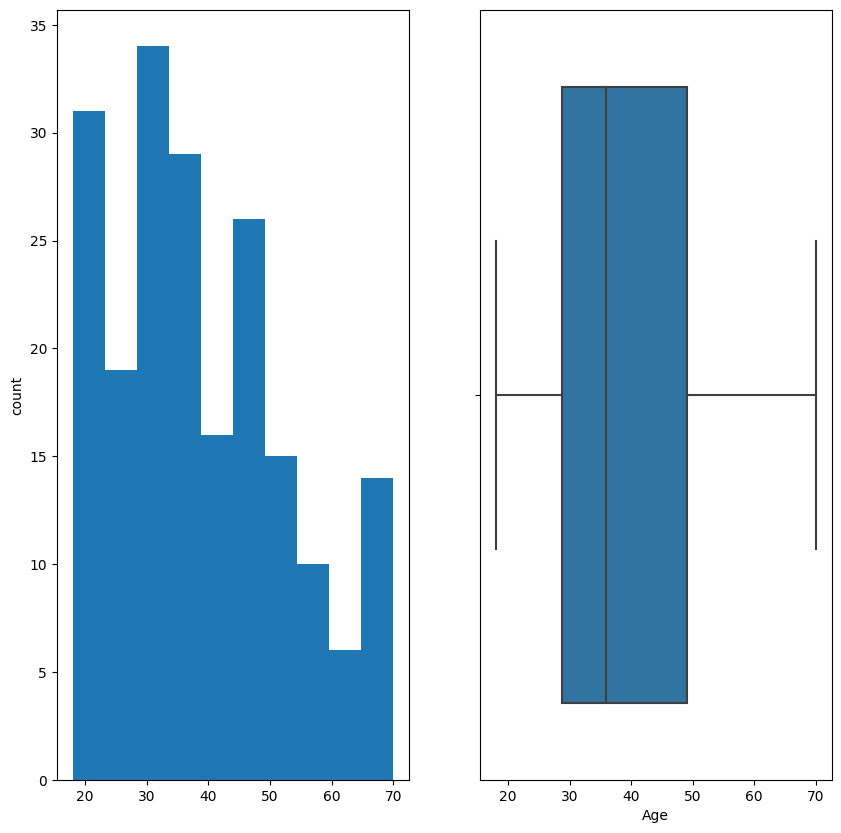

Annual Income (k$)
Skew:  0.32


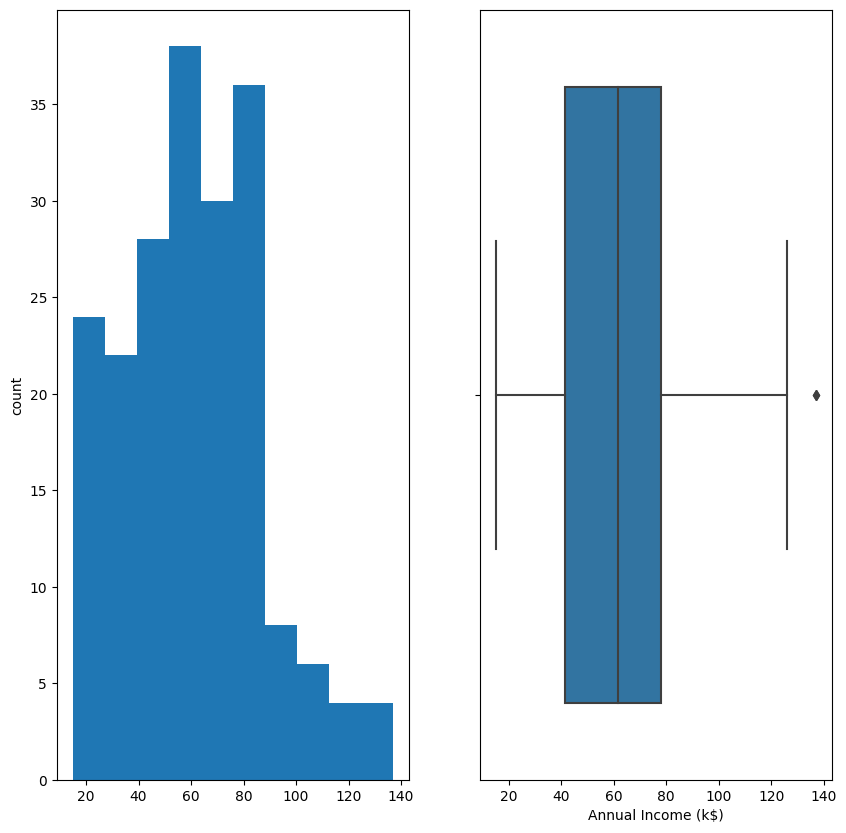

Spending Score (1-100)
Skew:  -0.05


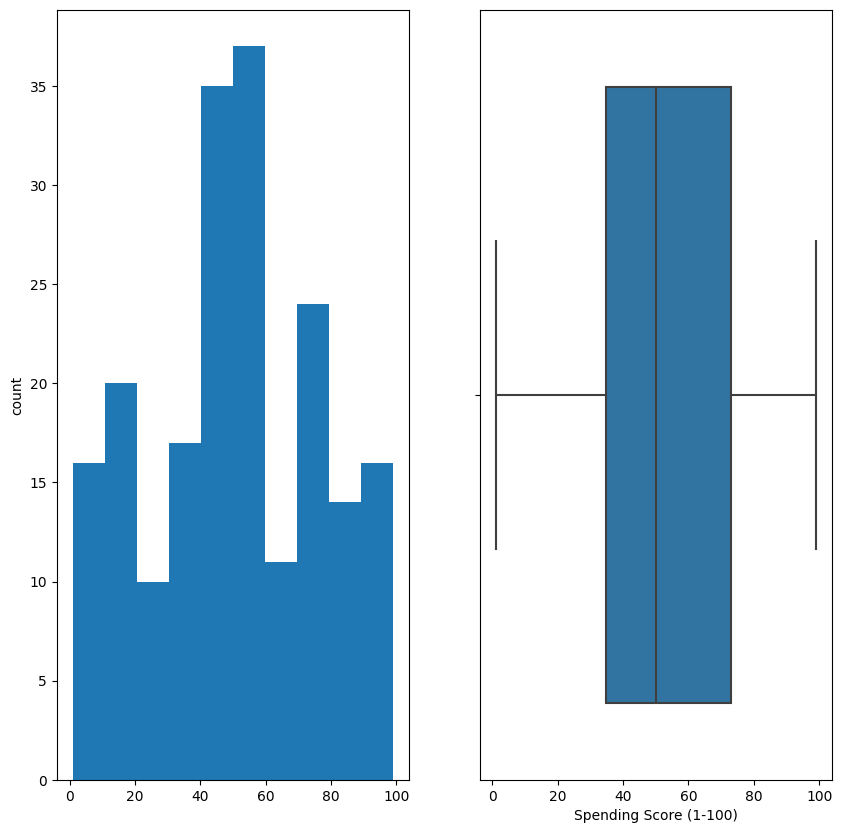

In [ ]:
num_data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
for col in num_data:
  print(col)
  print('Skew: ', round(data[col].skew(), 2))
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  data[col].hist(bins = 10, grid = False)
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(x=data[col])
  plt.show()

### Observation:
* Age is right skewed. Majority of customers are approx. 31-32 years old.
* The age of the average customer (median) is 36 yrs old.
* The average age of customers (mean) is ~39 yrs old.
* Income is also right skewd. Majority of customers make around $60k.
* The income of the average customer is ~62K.
* The average income is ~61K.
* There is an outlier in which a customer makes approx 140k.
* Spending score looks normally distributed. Majority of customers have a spending score of ~58.
* The median spending score is 50 while the mean is 50.2.

Female    112
Male       88
Name: Gender, dtype: int64


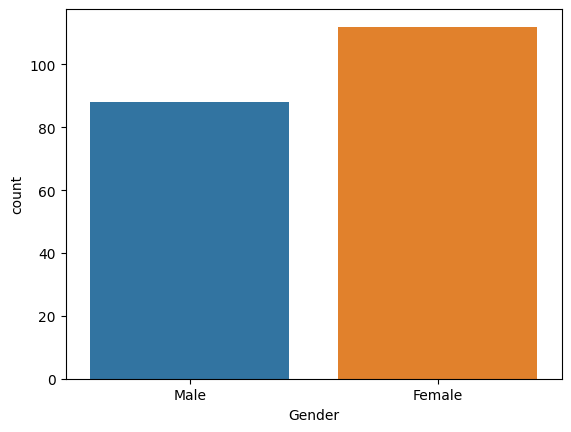

In [ ]:
sns.countplot(data = data, x = 'Gender')
print(data.Gender.value_counts())

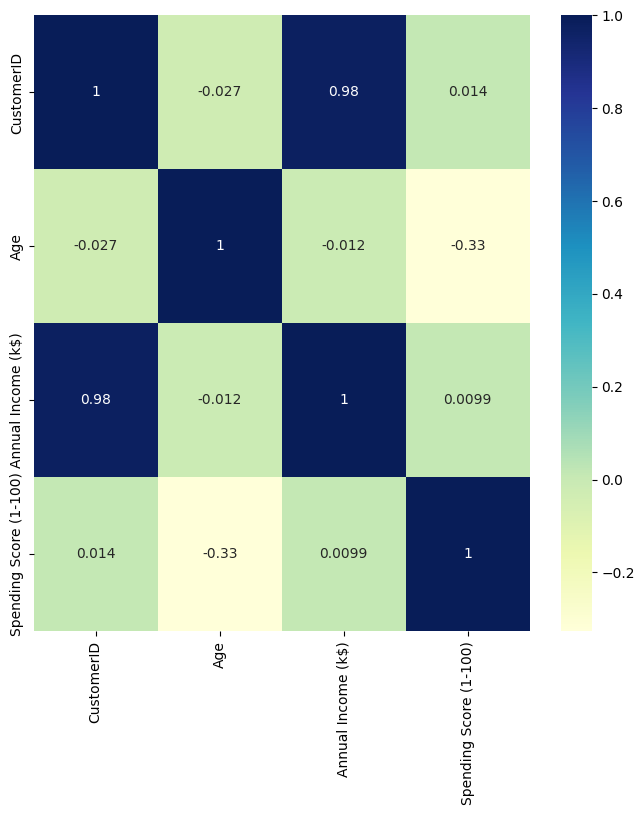

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Scaling the Data

In [ ]:
#dropping customerID and gender column since it doesn't help with clustering info
data2 = data.drop(['CustomerID','Gender'], axis =1)

In [ ]:
sc = StandardScaler()
data_scaled = pd.DataFrame(sc.fit_transform(data2), columns= data2.columns)

In [ ]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

### KMeans

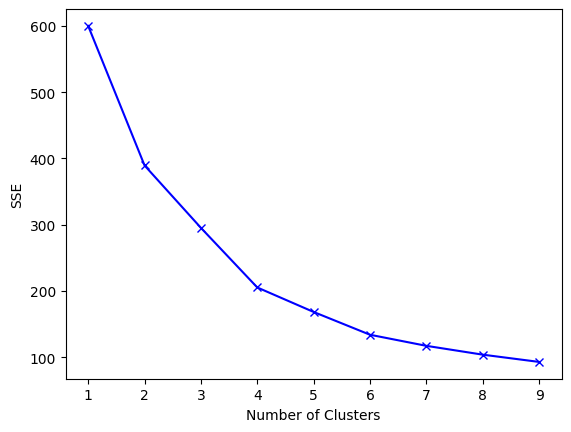

In [ ]:
# Empty dictionary to store the SSE for each value of k
sse = {}

# Iterate for a range of k's and fit the scaled data to the algorithm. Use the inerita attribute from the clustering object and
# Store the inertia value for that k
for k in range(1, 10):
  kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)
  sse[k] = kmeans.inertia_

#Elbow Plot
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of Clusters")
plt.ylabel('SSE')
plt.show()

### Observation:
* Using KMeans, it is unclear what the optimal number of clusters should be.
* The best guess is 2 using KMeans.


### SIlhouette Score

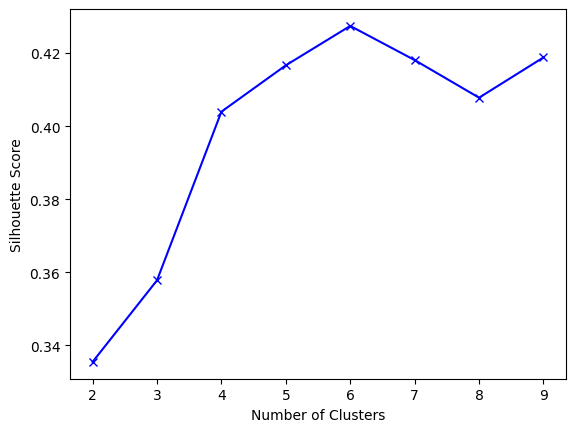

In [ ]:
#v Empty dictionary to store the Silhouette Score for each value of k
shc = {}

# Iterate for a range of k's and fit the scaled data to the algorithm. Store the silhouette score for that k
for k in range(2, 10):
  kmeans = KMeans(n_clusters = k, random_state = 1).fit(data_scaled)
  labels = kmeans.predict(data_scaled)
  shc[k] = silhouette_score(data_scaled, labels)

# Elbow plot
plt.figure()
plt.plot(list(shc.keys()), list(shc.values()), 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### Observation:
* We can see from the plot that the silhouette score is highest for k=6. So we can start with first understanding these 6 clusters.

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(data_scaled)

#Adding predicted labels to the scaled data and the original dataset
data_scaled_copy['KMeans_Label'] = kmeans.predict(data_scaled)
data['KMeans_Label'] = kmeans.predict(data_scaled)

In [ ]:
data['KMeans_Label'].value_counts()

5    45
1    39
3    38
4    33
2    24
0    21
Name: KMeans_Label, dtype: int64

### Observation:
* WIth 6 clusters, the observations look evenly distributed.

In [ ]:
#Calculating mean and median of the original dataset
mean = data.groupby('KMeans_Label').mean()
median = data.groupby('KMeans_Label').median()
df_KMeans = pd.concat([mean, median], axis =0)
df_KMeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean', 'group_4 Mean', 'group_5 Mean',
                   'group_0 Median', 'group_1 Median', 'group_2 Median', 'group_3 Median', 'group_4 Mean', 'group_5 Median']
df_KMeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_3 Mean,group_4 Mean,group_5 Mean,group_0 Median,group_1 Median,group_2 Median,group_3 Median,group_4 Mean,group_5 Median
CustomerID,23.190476,162.000000,23.041667,92.552632,165.303030,83.777778,23.0,162.0,23.0,94.5,167.0,81.0
Age,45.523810,32.692308,25.250000,26.684211,41.939394,56.333333,46.0,32.0,23.5,26.0,43.0,54.0
Annual Income (k$),26.285714,86.538462,25.833333,57.578947,88.939394,54.266667,25.0,79.0,24.5,60.0,86.0,54.0
Spending Score (1-100),19.380952,82.128205,76.916667,47.789474,16.969697,49.066667,15.0,83.0,76.5,49.5,16.0,49.0


### Observation:
Using k = 6 clusters, it looks like:
* Cluster 0 is of middle aged low income customers who have a low spending score.
* Cluster 1 is of middle aged high income customers with a high spending score.
* Cluster 2 is of young adults with low income and a relatively high spending score.
* Cluster 3 is of young adults with below average income and below average spending score.
* Cluster 4 is of middle aged high income customers with a low spending score.
* Cluster 5 is old aged customers with a below average income and average spending score.

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 1)
kmeans.fit(data_scaled)

data_scaled_copy['KMeans_Label'] = kmeans.predict(data_scaled)
data['KMeans_Label'] = kmeans.predict(data_scaled)

In [ ]:
data['KMeans_Label'].value_counts()

3    65
0    57
1    40
2    38
Name: KMeans_Label, dtype: int64

In [ ]:
mean = data.groupby('KMeans_Label').mean()
median = data.groupby('KMeans_Label').median()
df_Kmeans = pd.concat([mean, median], axis = 0)
df_Kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_3 Mean',
                   'group_0 Median', 'group_1 Median', 'group_2 Median', 'group_3 Median']
df_Kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_3 Mean,group_0 Median,group_1 Median,group_2 Median,group_3 Median
CustomerID,53.438596,161.025,160.552632,69.415385,48.0,161.0,161.0,71.0
Age,25.438596,32.875,39.368421,53.984615,24.0,32.0,40.5,52.0
Annual Income (k$),40.000000,86.100,86.500000,47.707692,40.0,78.5,79.5,49.0
Spending Score (1-100),60.298246,81.525,19.578947,39.969231,56.0,83.0,17.0,46.0


### Observation:
Using k=4 clusters, it looks like:
* Cluster 0 is of young adult customers  with low income and an above average spending score.
* Cluster 1 is of middle aged adult customers with high income and a high spending score.
* Cluster 2 is of middle aged adult customers with high income as well but a very low spending score.
* Cluster 3 is of old aged adult customers with low income and low spending score.

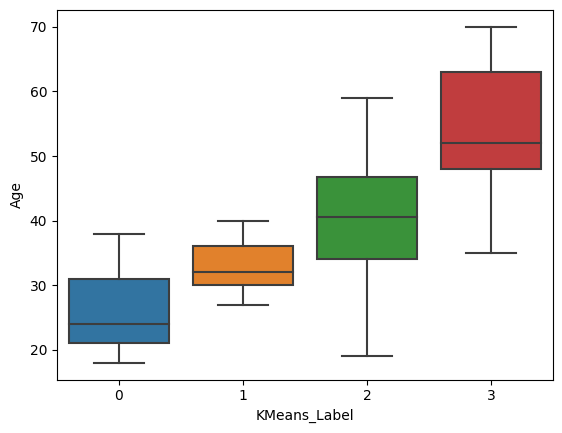

<Figure size 800x800 with 0 Axes>

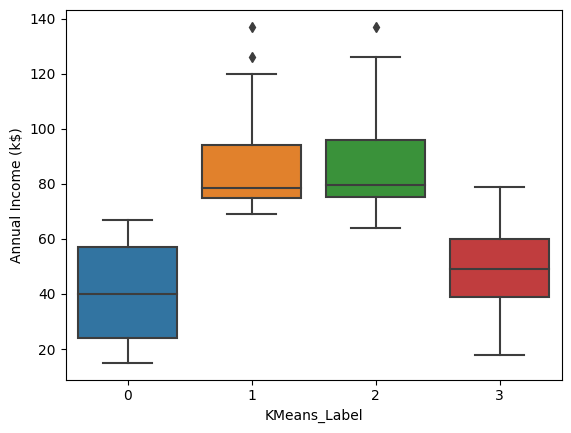

<Figure size 800x800 with 0 Axes>

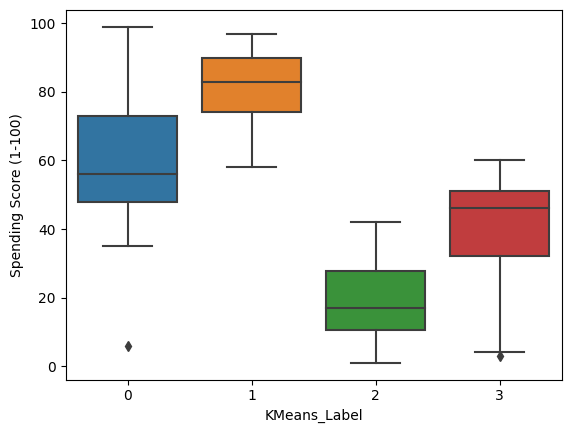

<Figure size 800x800 with 0 Axes>

In [ ]:
# Visualizing the clusters
cols_visualize = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in cols_visualize:
  sns.boxplot(x = 'KMeans_Label', y = col, data = data)
  plt.figure(figsize =(8,8))
  plt.show()

### Cluster Profile
* Cluster 0: Medium value customers. These customers have a low income and a slightly above average spending score. These customers might purchase a few items but are not likely to spend a lot of money at the store.
* Cluster 1: Top customers. These customers have a high spending score which means they visit the mall often and have a tendency to always purchase items.
* Cluster 2: High value customers. These are high income customers who don't spend too often as they have a very low spending score. These customers could be persuaded to visit the store more often with personalized ads.(Medium Value Customers)
* Cluster 3: Low value customers. These customers are old aged with a low income and low spending score.

In [ ]:
data['Cluster_Profile'] = data.apply(lambda x: 'Medium Value Customer' if x['KMeans_Label'] == 0 else \
                                     'Top Customer' if (x['KMeans_Label'] == 1) else\
                                     'High Value Customer' if (x['KMeans_Label'] == 2) else 'Low Value Customer', axis = 1)

In [ ]:
data.head(30)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Label,Cluster_Profile
0,1,Male,19,15,39,0,Medium Value Customer
1,2,Male,21,15,81,0,Medium Value Customer
2,3,Female,20,16,6,0,Medium Value Customer
3,4,Female,23,16,77,0,Medium Value Customer
4,5,Female,31,17,40,0,Medium Value Customer
5,6,Female,22,17,76,0,Medium Value Customer
6,7,Female,35,18,6,3,Low Value Customer
7,8,Female,23,18,94,0,Medium Value Customer
8,9,Male,64,19,3,3,Low Value Customer
9,10,Female,30,19,72,0,Medium Value Customer
